<h5 font-family:Arial;>Caitlyn</h5>
<h5 font-family:Arial;">12/12/2025</h5>
<h5 font-family:Arial;">Final Project</h5>
<h5 font-family:Arial;">CDC Provisional COVID-19 Death Data analysis</h5>

<h5 font-weight:bold; font-family:Arial;">Imports</h5>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h5 font-weight:bold; font-family:Arial;">Loading CSV</h5>


In [2]:
df = pd.read_csv("Provisional_COVID-19_Deaths_by_Sex_and_Age_20251205.csv", low_memory=False)
df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,All Ages,"1,146,774","12,303,399","1,162,844","569,264","22,229","1,760,095",NaN
1,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519,"73,213","1,056",95,64,"1,541",NaN
2,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,0-17 years,"1,696","130,970","2,961",424,509,"4,716",NaN
3,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,1-4 years,285,"14,299",692,66,177,"1,079",NaN
4,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,5-14 years,509,"22,008",818,143,219,"1,390",NaN


In [3]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137700 entries, 0 to 137699
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Data As Of                                137700 non-null  object 
 1   Start Date                                137700 non-null  object 
 2   End Date                                  137700 non-null  object 
 3   Group                                     137700 non-null  object 
 4   Year                                      134946 non-null  float64
 5   Month                                     123930 non-null  float64
 6   State                                     137700 non-null  object 
 7   Sex                                       137700 non-null  object 
 8   Age Group                                 137700 non-null  object 
 9   COVID-19 Deaths                           98270 non-null   object 
 10  Total Deaths        

Data As Of                                      0
Start Date                                      0
End Date                                        0
Group                                           0
Year                                         2754
Month                                       13770
State                                           0
Sex                                             0
Age Group                                       0
COVID-19 Deaths                             39430
Total Deaths                                19509
Pneumonia Deaths                            44864
Pneumonia and COVID-19 Deaths               36884
Influenza Deaths                            26688
Pneumonia, Influenza, or COVID-19 Deaths    44233
Footnote                                    39804
dtype: int64

<h5 font-weight:bold; font-family:Arial;">Cleaned column names</h5>


In [4]:
df.columns = (
    df.columns
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("-", "_")
)

<h5 font-weight:bold; font-family:Arial;">Check missing values after column cleaning</h5>


In [5]:
df.isna().sum()

data_as_of                                      0
start_date                                      0
end_date                                        0
group                                           0
year                                         2754
month                                       13770
state                                           0
sex                                             0
age_group                                       0
covid_19_deaths                             39430
total_deaths                                19509
pneumonia_deaths                            44864
pneumonia_and_covid_19_deaths               36884
influenza_deaths                            26688
pneumonia,_influenza,_or_covid_19_deaths    44233
footnote                                    39804
dtype: int64

<h5 font-weight:bold; font-family:Arial;">Handling missing death values</h5>

Missing values in death-related columns were removed because the dataset does not specify that missing values represent zero, and filling them could bias the analysis.

In [6]:
numeric_cols = [
    "covid_19_deaths",
    "total_deaths",
    "pneumonia_deaths",
    "pneumonia_and_covid_19_deaths",
    "influenza_deaths",
    "pneumonia,_influenza,_or_covid_19_deaths"
]

# remove commas and convert to numeric
for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", "", regex=False)
    )

# convert to numeric
df[numeric_cols] = df[numeric_cols].apply(
    pd.to_numeric,
    errors="coerce"
)

# drop rows with missing death values
df = df.dropna(subset=numeric_cols)

# convert to integers
df[numeric_cols] = df[numeric_cols].astype(int)

<h5 font-weight:bold; font-family:Arial;">Check for any remaining NaNs</h5>


In [7]:
df.isna().sum()

data_as_of                                      0
start_date                                      0
end_date                                        0
group                                           0
year                                         1305
month                                        4857
state                                           0
sex                                             0
age_group                                       0
covid_19_deaths                                 0
total_deaths                                    0
pneumonia_deaths                                0
pneumonia_and_covid_19_deaths                   0
influenza_deaths                                0
pneumonia,_influenza,_or_covid_19_deaths        0
footnote                                    39804
dtype: int64

Remaining missing values occur only in the year, month, and footnote columns, which are expected due to aggregated records and optional metadata and do not affect the death count analysis.

<h5 font-weight:bold; font-family:Arial;">Check for outliers</h5>

In [8]:
df.describe()

,year,month,covid_19_deaths,total_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,"pneumonia,_influenza,_or_covid_19_deaths"
count,38499.000000,34947.000000,3.980400e+04,3.980400e+04,3.980400e+04,39804.000000,39804.000000,3.980400e+04
mean,2021.225694,6.484419,6.735513e+02,7.215437e+03,6.814865e+02,336.652924,13.745905,1.030559e+03
std,1.029564,3.412469,9.396709e+03,9.666126e+04,9.340308e+03,4733.412587,184.363712,1.416063e+04
min,2020.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2020.000000,4.000000,0.000000e+00,2.200000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,2021.000000,7.000000,2.800000e+01,3.090000e+02,3.100000e+01,13.000000,0.000000,4.700000e+01
75%,2022.000000,9.000000,1.090000e+02,1.357000e+03,1.190000e+02,52.000000,0.000000,1.800000e+02
max,2023.000000,12.000000,1.146774e+06,1.230340e+07,1.162844e+06,569264.000000,22229.000000,1.760095e+06


<h5 font-weight:bold; font-family:Arial;">Check for weird formatting</h5>

In [9]:
df["age_group"].unique()
df["sex"].unique()

array(['All Sexes', 'Male', 'Female'], dtype=object)

<h5 font-weight:bold; font-family:Arial;">Check for duplicate rows</h5>

In [10]:
df.duplicated().sum()

np.int64(0)

<h5 font-weight:bold; font-family:Arial;">Correcting age so it isn't shown in alphabetial order</h5>

In [11]:
df_q1 = df[
    (df["sex"].isin(["Male", "Female"])) &
    (df["age_group"] != "All Ages")
].copy()

In [12]:
age_order = [
    "Under 1 year",
    "0-17 years",
    "1-4 years",
    "5-14 years",
    "15-24 years",
    "18-29 years",
    "25-34 years",
    "30-39 years",
    "35-44 years",
    "40-49 years",
    "45-54 years",
    "50-64 years",
    "55-64 years",
    "65-74 years",
    "75-84 years",
    "85 years and over"
]

df_q1["age_group"] = pd.Categorical(
    df_q1["age_group"],
    categories=age_order,
    ordered=True
)

<h2 font-weight:bold; font-family:Arial;">Question 1: How did provisional COVID-19 deaths differ between males and females across age groups?
</h2>

<h5 font-weight:bold; font-family:Arial;">Aggregate deaths
</h5>

In [13]:
q1 = (
    df_q1.groupby(["age_group", "sex"])["covid_19_deaths"]
    .sum()
    .reset_index()
)

q1.head()

C:\Users\caitl\AppData\Local\Temp\ipykernel_40944\2699313429.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q1.groupby(["age_group", "sex"])["covid_19_deaths"]


,age_group,sex,covid_19_deaths
0,Under 1 year,Female,718
1,Under 1 year,Male,852
2,0-17 years,Female,2578
3,0-17 years,Male,3102
4,1-4 years,Female,402


<h5 font-weight:bold; font-family:Arial;">Pivot for plotting
</h5>

In [14]:
pivot_q1 = q1.pivot(
    index="age_group",
    columns="sex",
    values="covid_19_deaths"
).fillna(0)

pivot_q1

sex,Female,Male
age_group,,
Under 1 year,718,852
0-17 years,2578,3102
1-4 years,402,453
5-14 years,744,783
15-24 years,4340,6159
18-29 years,10842,17307
25-34 years,19496,32271
30-39 years,32696,53485
35-44 years,53045,83131


<h5 font-weight:bold; font-family:Arial;">Plot
</h5>

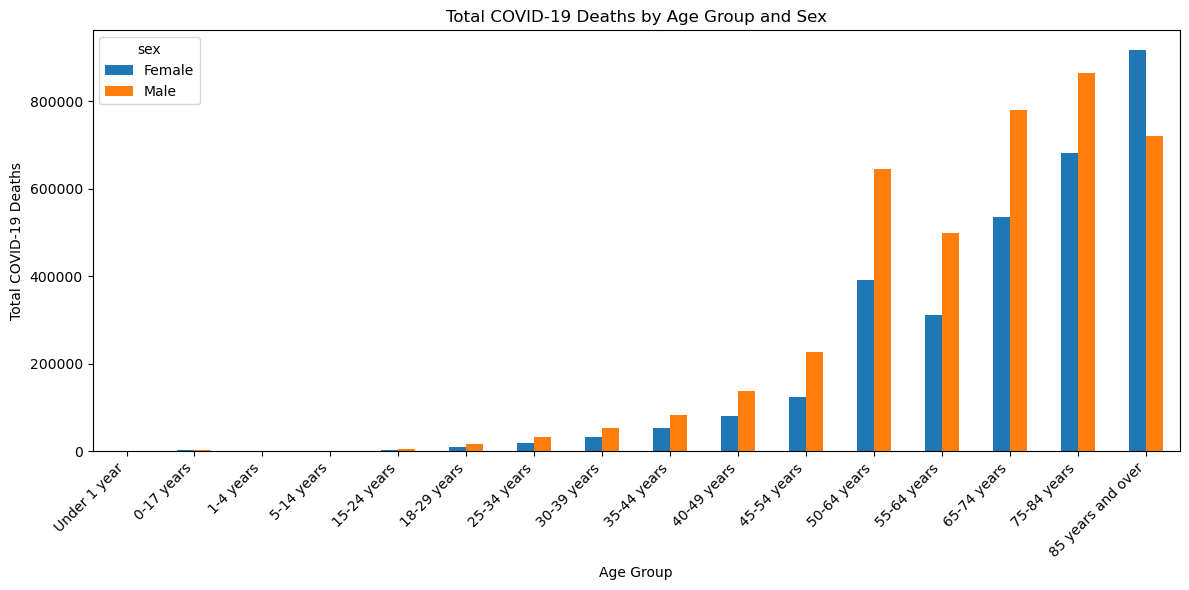

In [15]:
pivot_q1.plot(kind="bar", figsize=(12,6))
plt.title("Total COVID-19 Deaths by Age Group and Sex")
plt.xlabel("Age Group")
plt.ylabel("Total COVID-19 Deaths")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("q1.png", dpi=300, bbox_inches="tight")
plt.show()

The graph shows that males had higher COVID-19 death counts than females in most age groups, especially among older populations. This suggests that males were more affected by COVID-19 as age increased. The outlier is those 85 and older in which the death count was higher for females.

<h2 font-weight:bold; font-family:Arial;">Question 2: How did COVID-19 deaths change month-to-month within age groups?

<h5 font-weight:bold; font-family:Arial;">Filter
</h5>

In [16]:
df_ts = df[
    (df["age_group"] != "All Ages") &
    (df["year"].notna()) &
    (df["month"].notna())
].copy()

<h5 font-weight:bold; font-family:Arial;">Fixing data types
</h5>

In [17]:
df_ts["year"] = df_ts["year"].astype(int)
df_ts["month"] = df_ts["month"].astype(int)

<h5 font-weight:bold; font-family:Arial;">Making date column
</h5>

In [18]:
df_ts["date"] = pd.to_datetime(
    dict(year=df_ts["year"], month=df_ts["month"], day=1)
)

df_ts[["date", "age_group"]].head()

,date,age_group
13771,2020-01-01,Under 1 year
13772,2020-01-01,0-17 years
13773,2020-01-01,1-4 years
13774,2020-01-01,5-14 years
13775,2020-01-01,15-24 years


<h5 font-weight:bold; font-family:Arial;">Aggregate monthly deaths
</h5>

In [19]:
monthly_age = (
    df_ts.groupby(["date", "age_group"])["covid_19_deaths"]
    .sum()
    .reset_index()
)
monthly_age.head()

,date,age_group,covid_19_deaths
0,2020-01-01,0-17 years,0
1,2020-01-01,1-4 years,0
2,2020-01-01,15-24 years,0
3,2020-01-01,18-29 years,0
4,2020-01-01,25-34 years,0


In [20]:
monthly_age["age_group"] = pd.Categorical(
    monthly_age["age_group"],
    categories=age_order,
    ordered=True
)

<h5 font-weight:bold; font-family:Arial;">Select top age groups
</h5>

In [21]:
top_age_groups = (
    monthly_age.groupby("age_group")["covid_19_deaths"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

top_age_groups

C:\Users\caitl\AppData\Local\Temp\ipykernel_40944\1870410970.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_age.groupby("age_group")["covid_19_deaths"]


CategoricalIndex(['85 years and over', '75-84 years', '65-74 years',
                  '50-64 years', '55-64 years'],
                 categories=['Under 1 year', '0-17 years', '1-4 years', '5-14 years', ..., '55-64 years', '65-74 years', '75-84 years', '85 years and over'], ordered=True, dtype='category', name='age_group')

<h5 font-weight:bold; font-family:Arial;">Filter top groups
</h5>

In [22]:
monthly_top = monthly_age[
    monthly_age["age_group"].isin(top_age_groups)
]

<h5 font-weight:bold; font-family:Arial;">Plot
</h5>

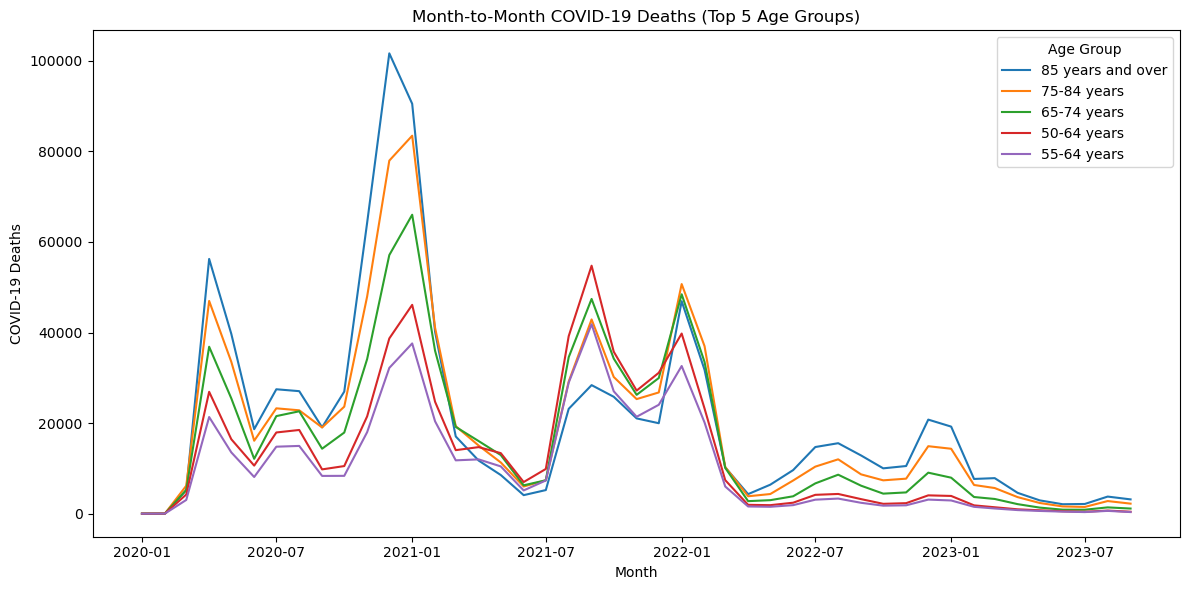

In [23]:
plt.figure(figsize=(12,6))

for age in top_age_groups:
    sub = monthly_top[
        monthly_top["age_group"] == age
    ].sort_values("date")
    
    plt.plot(sub["date"], sub["covid_19_deaths"], label=age)

plt.title("Month-to-Month COVID-19 Deaths (Top 5 Age Groups)")
plt.xlabel("Month")
plt.ylabel("COVID-19 Deaths")
plt.legend(title="Age Group")
plt.tight_layout()
plt.savefig("q2.png", dpi=300, bbox_inches="tight")
plt.show()

COVID-19 deaths changed a lot from month to month, with noticeable spikes during certain periods of the pandemic. Older age groups consistently had higher death counts during these spikes compared to younger age groups.


<h2 font-weight:bold; font-family:Arial;">Question 3: Which age groups account for the largest share of total COVID-19 deaths?

<h5 font-weight:bold; font-family:Arial;">Filter
</h5>

In [38]:
df_q3 = df[df["age_group"] != "All Ages"].copy()

<h5 font-weight:bold; font-family:Arial;">Aggregate total deaths by age group
</h5>

In [39]:
age_totals["age_group"] = pd.Categorical(
    age_totals["age_group"],
    categories=age_order,
    ordered=True
)

age_totals = age_totals.sort_values("age_group")

In [40]:
age_totals["age_group"] = pd.Categorical(
    age_totals["age_group"],
    categories=age_order,
    ordered=True
)

<h5 font-weight:bold; font-family:Arial;">Calculate % of total deaths
</h5>

In [41]:
total_deaths = age_totals["covid_19_deaths"].sum()

age_totals["percent_of_total"]=(
    age_totals["covid_19_deaths"]/total_deaths*100
)

age_totals

,age_group,covid_19_deaths,percent_of_total
15,Under 1 year,3158,0.021679
0,0-17 years,12001,0.082384
1,1-4 years,1710,0.011739
9,5-14 years,3159,0.021686
2,15-24 years,22083,0.151594
3,18-29 years,58008,0.398210
4,25-34 years,109398,0.750989
5,30-39 years,180796,1.241117
6,35-44 years,282172,1.937037
7,40-49 years,449468,3.085481


<h5 font-weight:bold; font-family:Arial;">Plot
</h5>

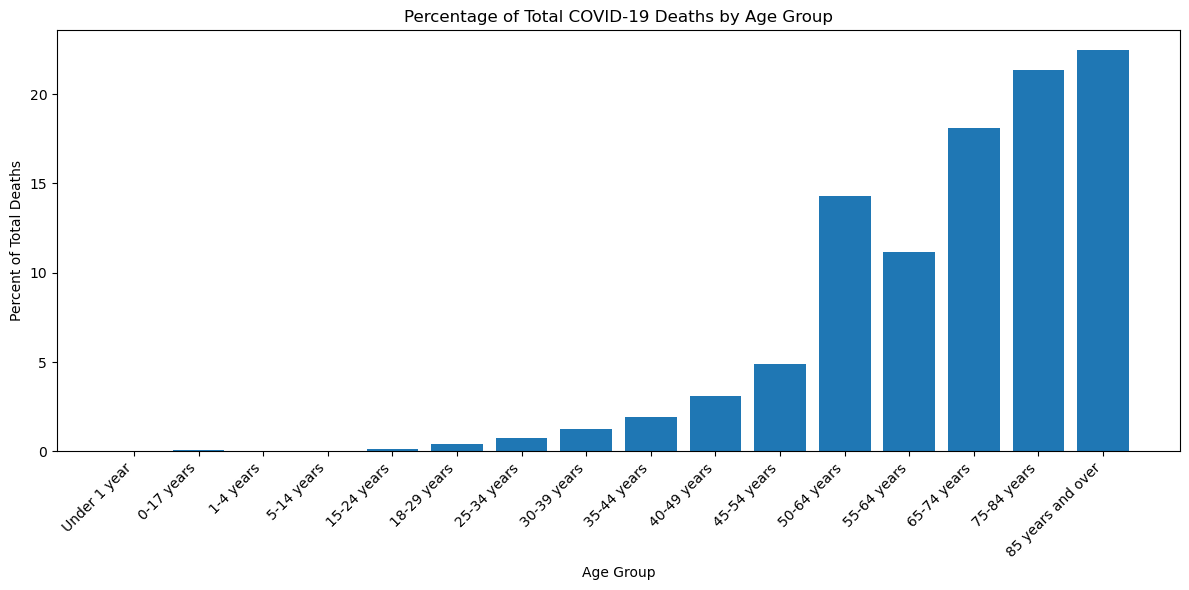

In [42]:
plt.figure(figsize=(12,6))

plt.bar(
    age_totals["age_group"],
    age_totals["percent_of_total"]
)

plt.title("Percentage of Total COVID-19 Deaths by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percent of Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("q3.png", dpi=300, bbox_inches="tight")
plt.show()

The chart shows that the majority of COVID-19 deaths came from older age groups, especially those ages 65–74, 75–84, and 85 years and over. Younger age groups make up a very small percentage of total deaths, showing that COVID-19 disproportionately affected older populations.


<h2 font-weight:bold; font-family:Arial;">
Question 4: Which states experienced the highest total number of COVID-19 deaths?
</h2>

<h5 font-weight:bold; font-family:Arial;">Checking values
</h5>

In [29]:
df["state"].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico'], dtype=object)

<h5 font-weight:bold; font-family:Arial;">Merging New York City into New York State
</h5>

In [30]:
df['state'] = df['state'].replace("New York City", "New York")

<h5 font-weight:bold; font-family:Arial;">Filter out national totals and non-states
</h5>

In [31]:
non_states = ["United States", "District of Columbia", "Puerto Rico"]

df_q4 = df[
    (~df["state"].isin(non_states)) &
    (df["age_group"] == "All Ages")
].copy()

<h5 font-weight:bold; font-family:Arial;">Aggregate deaths by state
</h5>

In [32]:
state_deaths = (
    df_q4.groupby("state")["covid_19_deaths"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

state_deaths

,state,covid_19_deaths
0,Texas,538223
1,California,527518
2,New York,399052
3,Florida,379973
4,Pennsylvania,252005
5,Ohio,231946
6,Michigan,181778
7,Illinois,179907
8,New Jersey,167697
9,Georgia,162299


<h5 font-weight:bold; font-family:Arial;">Plot top 10 states
</h5>

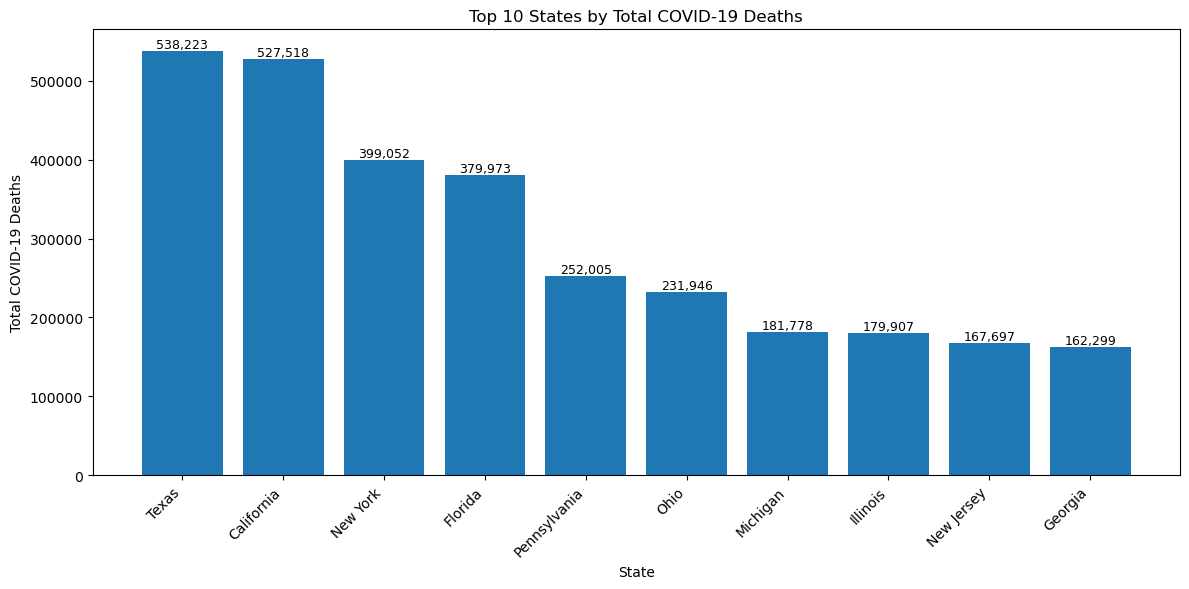

In [33]:
plt.figure(figsize=(12,6))
bars = plt.bar(state_deaths["state"], state_deaths["covid_19_deaths"])

plt.title("Top 10 States by Total COVID-19 Deaths")
plt.xlabel("State")
plt.ylabel("Total COVID-19 Deaths")
plt.xticks(rotation=45, ha="right")

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()

###### The graph shows that a small number of states account for a large share of total COVID-19 deaths. This suggests that COVID-19 impacts were not evenly distributed across the United States.

<h2 font-weight:bold; font-family:Arial;">Question 5: Which age and sex groups account for the highest number of COVID-19 deaths? (Extension of Q1)</h2>

<h5 font-weight:bold; font-family:Arial;">Plot
</h5>

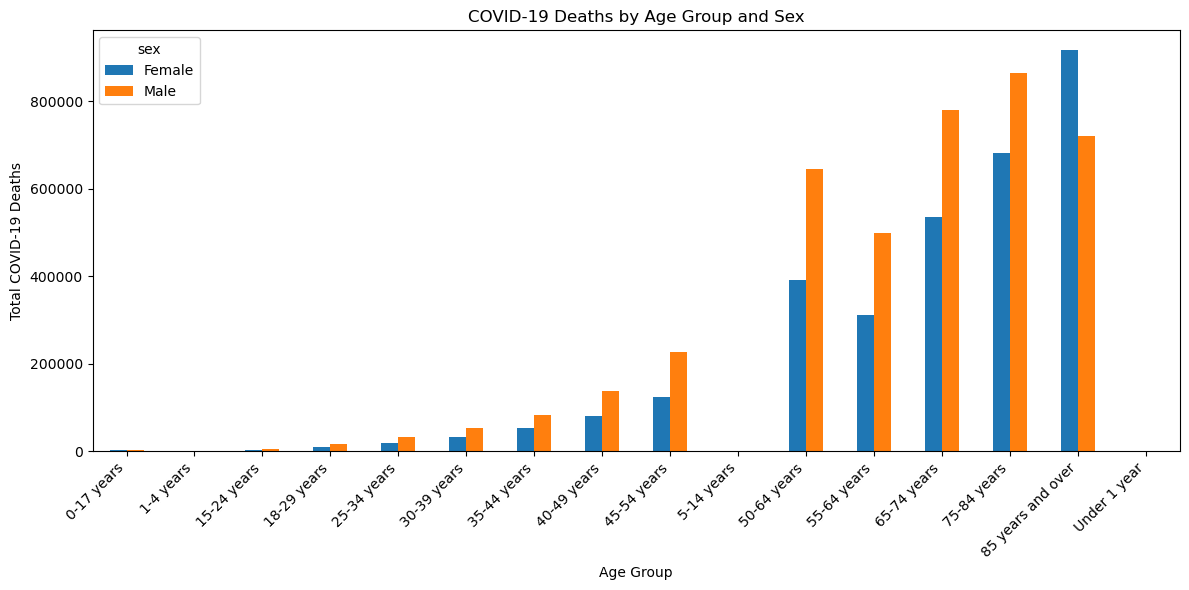

In [37]:
pivot_q5.plot(kind="bar", figsize=(12,6))
plt.title("COVID-19 Deaths by Age Group and Sex")
plt.xlabel("Age Group")
plt.ylabel("Total COVID-19 Deaths")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("q5.png", dpi=300, bbox_inches="tight")
plt.show()

Older age groups account for the highest number of COVID-19 deaths for both males and females. In nearly every age group, males experienced more deaths than females, especially among older populations.